In [1]:
# Standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducible random data
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Optional: use display settings for nicer tables
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Example brand list; replace or extend with actual brand names if available
brands = [
    {"brand": "BrandA", "type": "Global"},
    {"brand": "BrandB", "type": "Local"},
    {"brand": "BrandC", "type": "Premium"},
    {"brand": "BrandD", "type": "Budget"},
    {"brand": "BrandE", "type": "Global"},
    {"brand": "BrandF", "type": "Local"},
]

brands_df = pd.DataFrame(brands)
brands_df

,brand,type
0,BrandA,Global
1,BrandB,Local
2,BrandC,Premium
3,BrandD,Budget
4,BrandE,Global
5,BrandF,Local


In [3]:
def generate_brand_metrics(df, years=[2022, 2023, 2024]):
    rows = []
    for _, row in df.iterrows():
        base_sales = np.random.uniform(5, 200)  # base annual sales in $M
        base_margin = np.random.uniform(5, 25)  # base profit margin in %
        base_stores = np.random.randint(20, 800)  # number of stores
        
        for y in years:
            # Add some year-over-year variation
            sales = base_sales * np.random.uniform(0.9, 1.1)
            margin = base_margin + np.random.uniform(-2, 2)
            margin = max(0, min(margin, 40))  # clamp between 0 and 40%
            stores = int(base_stores * np.random.uniform(0.95, 1.05))
            
            rows.append({
                "brand": row["brand"],
                "type": row["type"],
                "year": y,
                "annual_sales_musd": sales,
                "profit_margin_pct": margin,
                "stores": stores
            })
    return pd.DataFrame(rows)

metrics_df = generate_brand_metrics(brands_df)
metrics_df.head(10)

,brand,type,year,annual_sales_musd,profit_margin_pct,stores
0,BrandA,Global,2022,82.40,24.40,125
1,BrandA,Global,2023,71.79,23.85,123
2,BrandA,Global,2024,72.46,24.62,120
3,BrandB,Local,2022,136.51,22.50,397
4,BrandB,Local,2023,146.51,23.50,396
5,BrandB,Local,2024,149.05,22.33,396
6,BrandC,Premium,2022,78.25,13.65,740
7,BrandC,Premium,2023,75.93,15.56,718
8,BrandC,Premium,2024,75.68,12.17,737
9,BrandD,Budget,2022,105.60,13.45,362


In [4]:
def generate_demographics(df):
    # For simplicity, assume each brand has a typical customer profile
    rows = []
    for _, row in df.iterrows():
        # Random but realistic proportions
        age_18_24 = np.random.uniform(0.15, 0.35)
        age_25_34 = np.random.uniform(0.20, 0.40)
        age_35_44 = np.random.uniform(0.10, 0.25)
        age_45_plus = 1 - (age_18_24 + age_25_34 + age_35_44)
        
        income_low = np.random.uniform(0.20, 0.40)
        income_mid = np.random.uniform(0.30, 0.50)
        income_high = 1 - (income_low + income_mid)
        
        gender_male = np.random.uniform(0.40, 0.60)
        gender_female = 1 - gender_male
        
        region = np.random.choice(["Northeast", "Midwest", "South", "West"])
        
        rows.append({
            "brand": row["brand"],
            "age_18_24": age_18_24,
            "age_25_34": age_25_34,
            "age_35_44": age_35_44,
            "age_45_plus": age_45_plus,
            "income_low": income_low,
            "income_mid": income_mid,
            "income_high": income_high,
            "gender_male": gender_male,
            "gender_female": gender_female,
            "region": region
        })
    return pd.DataFrame(rows)

demo_df = generate_demographics(brands_df)
demo_df.head()

,brand,age_18_24,age_25_34,age_35_44,age_45_plus,income_low,income_mid,income_high,gender_male,gender_female,region
0,BrandA,0.35,0.35,0.13,0.17,0.20,0.46,0.34,0.54,0.46,South
1,BrandB,0.31,0.32,0.24,0.13,0.33,0.48,0.19,0.57,0.43,West
2,BrandC,0.22,0.21,0.15,0.42,0.27,0.45,0.29,0.53,0.47,South
3,BrandD,0.26,0.28,0.25,0.22,0.37,0.44,0.19,0.45,0.55,Midwest
4,BrandE,0.25,0.30,0.16,0.28,0.21,0.32,0.47,0.41,0.59,South


In [5]:
combined_df = metrics_df.merge(demo_df, on="brand", how="left")
combined_df.head()

,brand,type,year,annual_sales_musd,profit_margin_pct,stores,age_18_24,age_25_34,age_35_44,age_45_plus,income_low,income_mid,income_high,gender_male,gender_female,region
0,BrandA,Global,2022,82.40,24.40,125,0.35,0.35,0.13,0.17,0.20,0.46,0.34,0.54,0.46,South
1,BrandA,Global,2023,71.79,23.85,123,0.35,0.35,0.13,0.17,0.20,0.46,0.34,0.54,0.46,South
2,BrandA,Global,2024,72.46,24.62,120,0.35,0.35,0.13,0.17,0.20,0.46,0.34,0.54,0.46,South
3,BrandB,Local,2022,136.51,22.50,397,0.31,0.32,0.24,0.13,0.33,0.48,0.19,0.57,0.43,West
4,BrandB,Local,2023,146.51,23.50,396,0.31,0.32,0.24,0.13,0.33,0.48,0.19,0.57,0.43,West


In [6]:
# Aggregate latest year data
latest_year = combined_df["year"].max()
latest_df = combined_df[combined_df["year"] == latest_year]

# Group by brand type
type_group = latest_df.groupby("type").agg({
    "annual_sales_musd": "mean",
    "profit_margin_pct": "mean",
    "stores": "sum"
}).reset_index()

type_group

,type,annual_sales_musd,profit_margin_pct,stores
0,Budget,124.24,11.74,370
1,Global,70.62,19.66,245
2,Local,123.98,23.88,1108
3,Premium,75.68,12.17,737


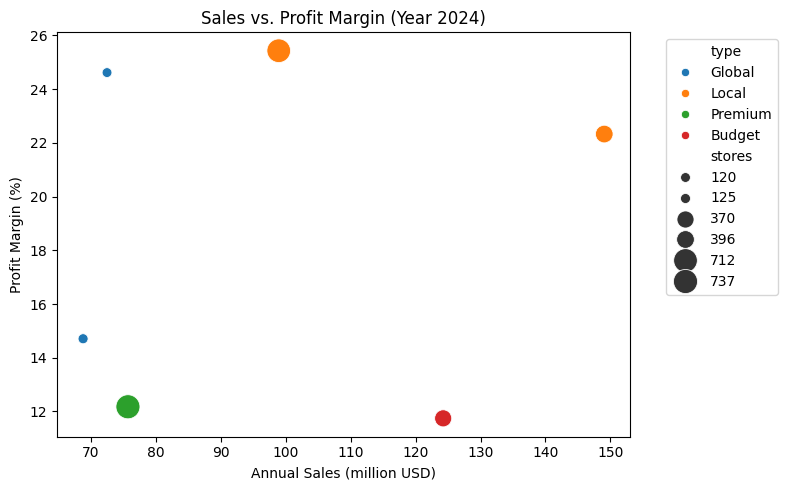

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=latest_df,
    x="annual_sales_musd",
    y="profit_margin_pct",
    hue="type",
    size="stores",
    sizes=(50, 300),
)
plt.title(f"Sales vs. Profit Margin (Year {latest_year})")
plt.xlabel("Annual Sales (million USD)")
plt.ylabel("Profit Margin (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

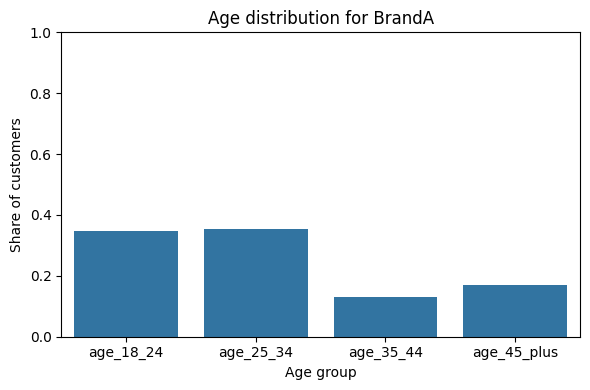

In [8]:
selected_brand = latest_df["brand"].iloc[0]  # or set to any brand name
demo_row = demo_df[demo_df["brand"] == selected_brand]

age_cols = ["age_18_24", "age_25_34", "age_35_44", "age_45_plus"]
demo_row_melt = demo_row.melt(id_vars=["brand"], value_vars=age_cols,
                              var_name="age_group", value_name="share")

plt.figure(figsize=(6,4))
sns.barplot(data=demo_row_melt, x="age_group", y="share")
plt.title(f"Age distribution for {selected_brand}")
plt.ylabel("Share of customers")
plt.xlabel("Age group")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [9]:
# Save combined dataset to CSV
combined_df.to_csv("froyo_brand_dataset.csv", index=False)

# Optional: save the brand list and demographics separately
brands_df.to_csv("froyo_brand_list.csv", index=False)
demo_df.to_csv("froyo_brand_demographics.csv", index=False)

print("Datasets saved.")

Datasets saved.
